**BANGKIT MACHINE LEARNING AUTISM DETECTION**


In [1]:
!nvidia-smi

Sat Jun  3 20:58:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd
import os
import random
import time
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K


In [3]:
!pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

 **PRE-PROCESSING DATA**

In [67]:
TRAINING_DIR = "/content/drive/MyDrive/BANGKITcapstone/autism/train"
VALIDATION_DIR = "/content/drive/MyDrive/BANGKITcapstone/autism/valid"

In [68]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

    # Instantiate the ImageDataGenerator class
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

    # Instantiate the ImageDataGenerator class 
    validation_datagen = ImageDataGenerator(rescale=1./255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  target_size=(224, 224))

    return train_generator, validation_generator


In [69]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


**MAKING A MODEL**

In [70]:
#def make_model():
   # model = tf.keras.models.Sequential([
       # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
       # tf.keras.layers.MaxPooling2D(2, 2),
       # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
       # tf.keras.layers.MaxPooling2D(2, 2),
       # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
       # tf.keras.layers.MaxPooling2D(2, 2),
       # tf.keras.layers.Flatten(),
       # tf.keras.layers.Dense(256, activation='relu'),
       # tf.keras.layers.Dense(1, activation='sigmoid')
   # ])

  #  model.compile(optimizer=RMSprop(learning_rate=0.002),
               #   loss='binary_crossentropy',
               #   metrics=['accuracy'])
  
   # return model

**TESTING TRANSFER LEARNING**

In [71]:
!pip install keras-vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from tensorflow.keras.applications import VGG16

def new_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    #for layer in base_model.layers:
        #layer.trainable = False

    model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.002),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
#def best_model():
    #base_model = tf.keras.models.load_model('/content/drive/MyDrive/BANGKITcapstone/best_model1TL_785.h5')
    #for layer in base_model.layers:
    #    layer.trainable = False

    #model = tf.keras.models.Sequential()
    #model.add(base_model)
    #model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(1, activation='sigmoid'))
    
   # model.compile(optimizer=Adam(learning_rate=0.002),
   #               loss='binary_crossentropy',
   #               metrics=['accuracy'])
    #return model

In [80]:
model = new_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_36 (Conv2D)          (None, 7, 7, 32)          147488    
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_12 (Flatten)        (None, 1152)              0         
                                                     

In [81]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [82]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [83]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 0.9 ** epoch)

**TRAIN THE MODEL**

In [84]:
model = new_model()

# Train the model

history = model.fit(train_generator,
                    epochs=200,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[es, mc, lr_scheduler]
                    )

Epoch 1/200
79/79 [==============================] - 61s 666ms/step - loss: 0.6922 - accuracy: 0.5198 - val_loss: 0.6831 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 2/200
79/79 [==============================] - 51s 642ms/step - loss: 0.6343 - accuracy: 0.6330 - val_loss: 0.6465 - val_accuracy: 0.6400 - lr: 9.0000e-05
Epoch 3/200
79/79 [==============================] - 52s 657ms/step - loss: 0.6044 - accuracy: 0.6714 - val_loss: 0.5838 - val_accuracy: 0.6400 - lr: 8.1000e-05
Epoch 4/200
79/79 [==============================] - 52s 658ms/step - loss: 0.5436 - accuracy: 0.7379 - val_loss: 0.5627 - val_accuracy: 0.6850 - lr: 7.2900e-05
Epoch 5/200
79/79 [==============================] - 53s 663ms/step - loss: 0.5162 - accuracy: 0.7419 - val_loss: 0.5261 - val_accuracy: 0.7750 - lr: 6.5610e-05
Epoch 6/200
79/79 [==============================] - 51s 646ms/step - loss: 0.5035 - accuracy: 0.7617 - val_loss: 0.5163 - val_accuracy: 0.7650 - lr: 5.9049e-05
Epoch 7/200
79/79 [===============

**VISUALIZE TRAINING HISTORY**

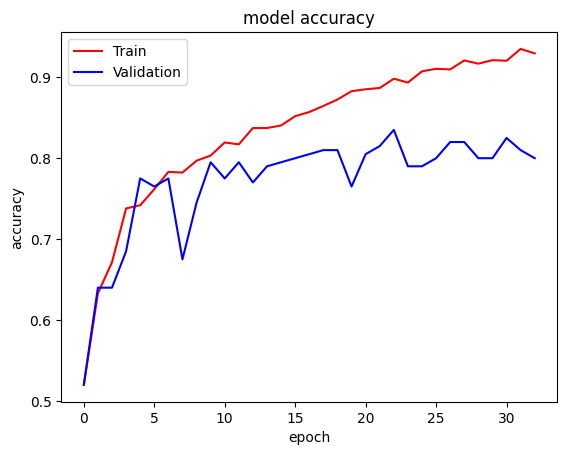

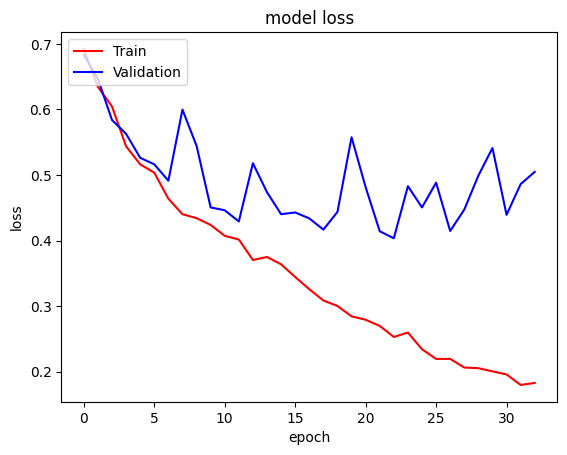

In [85]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# summarize history for accuracy
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [86]:
  # Evaluate the best model on the training and validation data
  from tensorflow.keras.models import load_model

  # Load the best model
  best_model = load_model('/content/best_model.h5')

  # Evaluate the best model on the training and validation data
  train_results = best_model.evaluate(train_generator)
  val_results = best_model.evaluate(validation_generator)

  # Print the evaluation results
  print("Training Loss:", train_results[0])
  print("Training Accuracy:", train_results[1])
  print("Validation Loss:", val_results[0])
  print("Validation Accuracy:", val_results[1])

7/7 [==============================] - 2s 221ms/step - loss: 0.4035 - accuracy: 0.8350
Training Loss: 0.23837533593177795
Training Accuracy: 0.9014251828193665
Validation Loss: 0.4034539461135864
Validation Accuracy: 0.8349999785423279


**VISUALIZING PREDICTIONS**

7/7 [==============================] - 1s 194ms/step


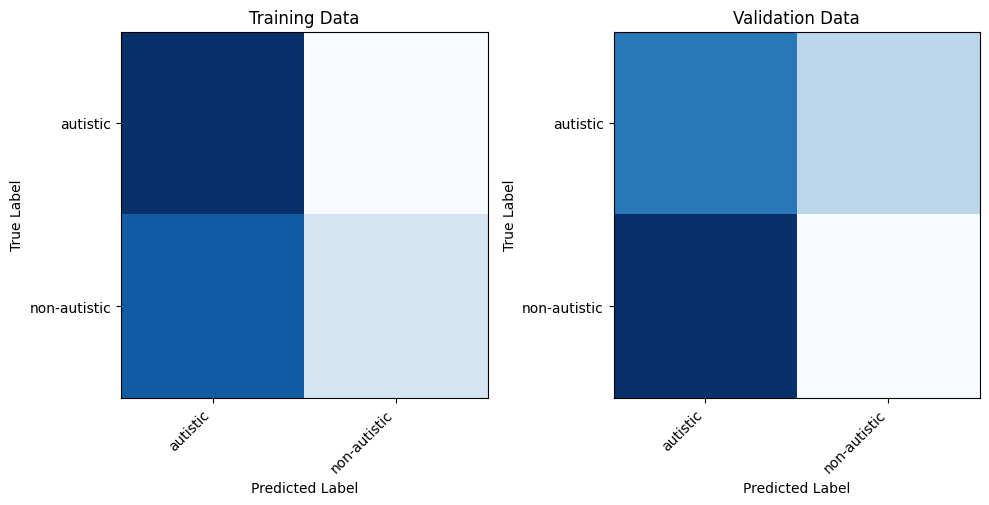

In [87]:
# Define the classes (labels)
classes = ['autistic', 'non-autistic']

# Make predictions on training and validation data
train_predictions = model.predict(train_generator)
val_predictions = model.predict(validation_generator)

# Convert the predictions to class labels
train_pred_labels = np.round(train_predictions).flatten()
val_pred_labels = np.round(val_predictions).flatten()

# Get the true labels for training and validation data
train_true_labels = train_generator.classes
val_true_labels = validation_generator.classes

# Create a confusion matrix for training predictions
train_cm = confusion_matrix(train_true_labels, train_pred_labels)

# Create a confusion matrix for validation predictions
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(train_cm, cmap='Blues')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticks(np.arange(len(classes)))
axes[0].set_yticks(np.arange(len(classes)))
axes[0].set_xticklabels(classes)
axes[0].set_yticklabels(classes)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes[0].get_yticklabels(), rotation=0, ha="right")

axes[1].imshow(val_cm, cmap='Blues')
axes[1].set_title('Validation Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticks(np.arange(len(classes)))
axes[1].set_yticks(np.arange(len(classes)))
axes[1].set_xticklabels(classes)
axes[1].set_yticklabels(classes)
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes[1].get_yticklabels(), rotation=0, ha="right")

plt.tight_layout()
plt.show()

**SAVING THE MODEL**

In [88]:
model.save('/content/drive/MyDrive/BANGKITcapstone/best_model3TL.h5')

In [24]:
!pip install tensorflowjs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [89]:
!mkdir model3TL 

In [90]:
!tensorflowjs_converter --input_format keras best_model.h5 model3TL/

2023-06-03 23:10:03.728180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [91]:
!zip -r model3TL.zip model3TL

  adding: model3TL/ (stored 0%)
  adding: model3TL/group1-shard15of15.bin (deflated 7%)
  adding: model3TL/group1-shard6of15.bin (deflated 7%)
  adding: model3TL/group1-shard2of15.bin (deflated 7%)
  adding: model3TL/model.json (deflated 91%)
  adding: model3TL/group1-shard11of15.bin (deflated 7%)
  adding: model3TL/group1-shard12of15.bin (deflated 7%)
  adding: model3TL/group1-shard9of15.bin (deflated 7%)
  adding: model3TL/group1-shard3of15.bin (deflated 7%)
  adding: model3TL/group1-shard5of15.bin (deflated 7%)
  adding: model3TL/group1-shard4of15.bin (deflated 7%)
  adding: model3TL/group1-shard8of15.bin (deflated 7%)
  adding: model3TL/group1-shard10of15.bin (deflated 7%)
  adding: model3TL/group1-shard1of15.bin (deflated 7%)
  adding: model3TL/group1-shard7of15.bin (deflated 7%)
  adding: model3TL/group1-shard14of15.bin (deflated 7%)
  adding: model3TL/group1-shard13of15.bin (deflated 7%)


In [92]:
from google.colab import files
files.download('model3TL.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>